<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [16]:
##### Your Code Here #####
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [17]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [18]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
scaler = MinMaxScaler()

In [19]:
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)


In [20]:
x_train

array([[1.37816304e-02, 0.00000000e+00, 2.81524927e-01, ...,
        8.93617021e-01, 1.00000000e+00, 4.68818985e-01],
       [1.73654275e-04, 8.25000000e-01, 5.75513196e-02, ...,
        2.23404255e-01, 9.96167230e-01, 3.80794702e-02],
       [5.49837765e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.46089061e-01, 4.22185430e-02],
       ...,
       [3.18534767e-04, 3.50000000e-01, 2.05278592e-01, ...,
        4.57446809e-01, 9.12627969e-01, 1.68322296e-01],
       [2.40852297e-02, 0.00000000e+00, 7.00879765e-01, ...,
        2.23404255e-01, 6.59715568e-01, 3.87969095e-01],
       [9.07048543e-05, 6.00000000e-01, 9.05425220e-02, ...,
        3.19148936e-01, 9.49064501e-01, 7.31236203e-02]])

In [21]:
x_test


array([[0.72190697, 0.        , 0.63650075, ..., 0.87804878, 0.00698455,
        0.90222813],
       [0.00440139, 0.        , 0.33144796, ..., 0.58536585, 0.99476158,
        0.47522448],
       [0.00167219, 0.        , 0.14969834, ..., 0.87804878, 1.        ,
        0.26005986],
       ...,
       [0.07273042, 0.        , 0.69230769, ..., 0.20731707, 0.98041639,
        0.        ],
       [0.01378101, 0.        , 0.18778281, ..., 0.53658537, 0.98603089,
        0.25906219],
       [0.11628215, 0.        , 0.69230769, ..., 0.20731707, 0.57893889,
        0.26238776]])

In [22]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
# This is our perceptron from Monday's by-hand: 
model = Sequential()
# Input => Hidden
model.add(Dense(13, input_dim=13, activation='relu'))
# Hiddens
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(12, activation='relu'))
model.add(Dense(12, activation='relu'))
# Output
model.add(Dense(1, activation='relu'))


model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 13)                182       
_________________________________________________________________
dense_6 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


In [25]:
model_fit = model.fit(x_train, y_train, batch_size=32, epochs=200, validation_split=.1, verbose = False)


In [26]:
scores = model.evaluate(x_test, y_test)
print(f'{model.metrics_names[1]}: {scores[1]}')

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Source https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

In [27]:
print(model_fit.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


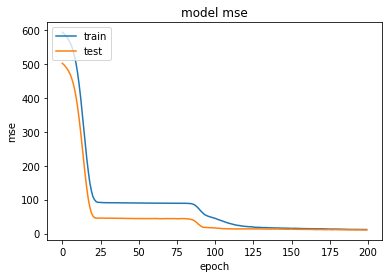

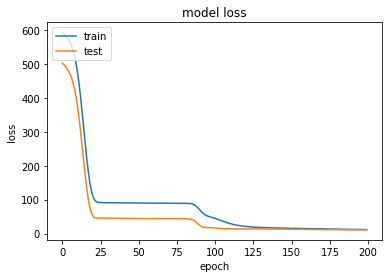

In [28]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model_fit.history['mse'])
plt.plot(model_fit.history['val_mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [31]:
lrmodel_fit = lr.fit(x_train, y_train)

In [32]:
print('.......MSE..........')
print('Training: ')
print("LR: ", mean_squared_error(lr.predict(x_train), y_train))
print("NN: ", mean_squared_error(model.predict(x_train), y_train))
print('\nTest: ')
print("LR: ", mean_squared_error(lr.predict(x_test), y_test))
print("NN: ", mean_squared_error(model.predict(x_test), y_test))

.......MSE..........
Training: 
LR:  22.00480083834814
NN:  11.567010797991923

Test: 
LR:  40.60145446671504
NN:  34.204123118351035


In [33]:
from sklearn.metrics import r2_score

In [34]:
nn_y_pred = model.predict(x_test)
lr_y_pred = lr.predict(x_test)
r2_score_nn= r2_score(y_test, nn_y_pred)
r2_score_lr= r2_score(y_test, lr_y_pred)

In [35]:
print('R2 Score comparation: ')
print('R2 Score NN: ',r2_score_nn)
print('R2 Score LR: ',r2_score_lr)

R2 Score comparation: 
R2 Score NN:  0.5891093008486343
R2 Score LR:  0.5122588012367337


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [8]:
##### Your Code Here #####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
# Reshape Data set 
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

In [11]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
# One hot encode to represent the 10 numbers
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
# This is our perceptron from Monday's by-hand: 
model2 = Sequential()
# Input => Hidden
model2.add(Dense(64, input_dim=784, activation='relu'))
# Hiddens
model2.add(Dense(32, activation='relu'))

# Output
model2.add(Dense(10, activation='relu'))


model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [16]:
model2_fit = model2.fit(X_train, y_train, batch_size=64, epochs=200, validation_split=0.1, verbose=0)

In [17]:
scores2 = model2.evaluate(X_test, y_test)
print(f'{model2.metrics_names[1]}: {scores2[1]}')

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [18]:
print(model2_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


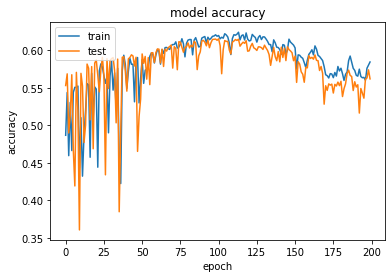

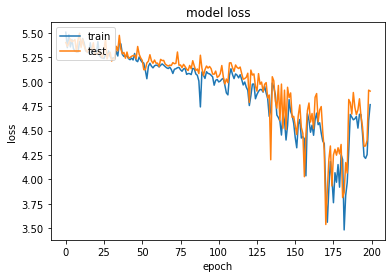

In [21]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model2_fit.history['accuracy'])
plt.plot(model2_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model2_fit.history['loss'])
plt.plot(model2_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.